In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from ast import literal_eval

In [88]:
# Path to the folder containing subfolders
main_folder_path = "/Users/carlonue/Documents/Venvs/pathpave_pymoo/log/radial_gradient_EN"

# Initialize an empty list to store dataframes
dataframes = []

In [89]:
# Iterate over each subfolder
for subfolder_name in os.listdir(main_folder_path):
    subfolder_path = os.path.join(main_folder_path, subfolder_name)
    
    # Check if it is a directory
    if os.path.isdir(subfolder_path):
        # Path to the optLog.csv file
        csv_file_path = os.path.join(subfolder_path, "optLog.csv")
        
        # Check if the file exists
        if os.path.exists(csv_file_path):
            # Read the CSV file into a dataframe and append to the list
            dataframes.append(pd.read_csv(csv_file_path).tail(10))

# Combine all dataframes
combined_dataframe = pd.concat(dataframes, ignore_index=True)


In [90]:
# extract the objective Values columns
obj_values = combined_dataframe.iloc[:, 13]

In [91]:
# preprocessing the dataframe
obj_values_corrected = []
for row in obj_values:
    if isinstance(row, str):
        row = literal_eval(row)
    obj_values_corrected.extend(row)

obj_values_corrected_nparray = np.array(obj_values_corrected)

In [92]:
# function definition for returning the non dominated points
def find_pareto_front(points):
    # Convert to list for easier deletion of dominated points
    points = points.tolist()
    i = 0
    while i < len(points):
        dominated = False
        j = 0
        while j < len(points):
            if i != j:
                # Check if point[j] dominates point[i]
                if all(points[j][k] <= points[i][k] for k in range(len(points[i]))) and \
                   any(points[j][k] < points[i][k] for k in range(len(points[i]))):
                    dominated = True
                    break
            j += 1
        if dominated:
            del points[i]  # Remove dominated point
        else:
            i += 1
    return np.array(points)

In [93]:
# Get all the pareto optimal points
pareto_points = find_pareto_front(obj_values_corrected_nparray)

In [10]:
pareto_points_rad_grad_lr = pareto_points

In [17]:
pareto_points_rad_grad_s2 = pareto_points

In [24]:
pareto_points_mr_lr = pareto_points

In [31]:
pareto_points_mr_s2 = pareto_points

In [38]:
pareto_points_sinus_s2 = pareto_points

In [45]:
pareto_points_sinus_lr = pareto_points

In [94]:
pareto_points_radgrad_en = pareto_points

In [100]:
# Initialize lists for all x and y points

x_points_radgrad_lr = []
y_points_radgrad_lr = []

x_points_radgrad_s2 = []
y_points_radgrad_s2 = []

x_points_mr_lr = []
y_points_mr_lr = []

x_points_mr_s2 = []
y_points_mr_s2 = []

x_points_sinus_s2 = []
y_points_sinus_s2 = []

x_points_sinus_lr= []
y_points_sinus_lr= []

x_points_radgrad_en = []
y_points_radgrad_en = []

# Iterate through each row in the column
for row in pareto_points_rad_grad_lr:
#if row[1] < 200:
            
    x_points_radgrad_lr.append(row[0])
    y_points_radgrad_lr.append(row[1])

for row in pareto_points_rad_grad_s2:
    
    x_points_radgrad_s2.append(row[0])
    y_points_radgrad_s2.append(row[1]) 

for row in pareto_points_mr_lr:
    x_points_mr_lr.append(row[0])
    y_points_mr_lr.append(row[1])

for row in pareto_points_mr_s2:
    x_points_mr_s2.append(row[0])
    y_points_mr_s2.append(row[1]) 

for row in pareto_points_sinus_lr:
    x_points_sinus_lr.append(row[0])
    y_points_sinus_lr.append(row[1])

for row in pareto_points_sinus_s2:
    x_points_sinus_s2.append(row[0])
    y_points_sinus_s2.append(row[1])

for row in pareto_points_radgrad_en:
    x_points_radgrad_en.append(row[0])
    y_points_radgrad_en.append(row[1])
    

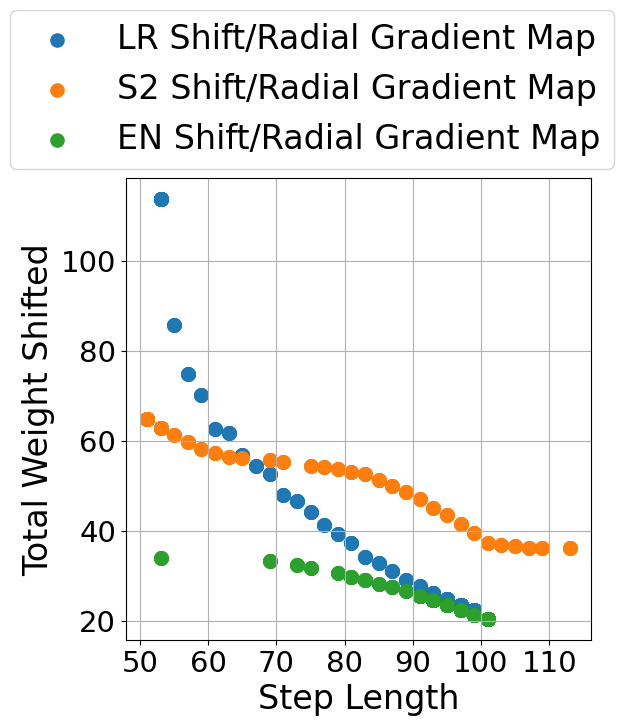

In [101]:
# Create scatter plot
plt.figure(figsize=(6, 6))

plt.scatter(x_points_radgrad_lr, y_points_radgrad_lr, s=90, alpha=1, label="LR Shift/Radial Gradient Map")
plt.scatter(x_points_radgrad_s2, y_points_radgrad_s2, s=90, alpha=1, label="S2 Shift/Radial Gradient Map")
#plt.scatter(x_points_mr_lr, y_points_mr_lr, s=90, alpha=1, label="LR Shift/River Map")
#plt.scatter(x_points_mr_s2, y_points_mr_s2, s=90, alpha=1, label="S2 Shift/River Map")
#plt.scatter(x_points_sinus_lr, y_points_sinus_lr, s=90, alpha=1, label="LR Shift/Sinusoidal Map")
#plt.scatter(x_points_sinus_s2, y_points_sinus_s2, s=90, alpha=1, label="S2 Shift/Sinusoidal Map")

plt.scatter(x_points_radgrad_en, y_points_radgrad_en, s=90, alpha=1, label="EN Shift/Radial Gradient Map")

plt.xlabel('Step Length', fontsize=24)
plt.ylabel('Total Weight Shifted', fontsize=24)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.4, 1.4), fontsize=24)

plt.show()